In [14]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
#import tensorflow_datasets as tfds

In [15]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def gen_model():
    # Defines & compiles the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.15), #adding dropout regularization throughout the model to deal with overfitting
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.1),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.10),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # 3 output neuron for the 3 classes of Animal Images
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    from tensorflow.keras.optimizers import RMSprop
    
    model.compile(loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['acc'])
    return model

In [26]:
# Trains a model to classify images of 3 classes: cat, dog, and panda
def train_test_animals():
    # Creates an instance of an ImageDataGenerator called train_datagen, and a train_generator, train_datagen.flow_from_directory
    
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    
    #splits data into training and testing(validation) sets
    train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)
    
    import matplotlib.pyplot as plt

    #training data
    train_generator = train_datagen.flow_from_directory(
                    'data/CNN_MultiClass_data/animals',
                    
                    # Source directory
                    target_size=(150, 150), # Resizes images
                    batch_size=15,
                    class_mode='categorical',subset = 'training')
    epochs = 2
    
    #Testing data
    validation_generator = train_datagen.flow_from_directory(
    'data/CNN_MultiClass_data/validation',
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    subset='validation') # set as validation data
    
    model = gen_model()
    #Model fitting for a number of epochs
    history = model.fit(
                                    train_generator,
                                    steps_per_epoch=150,
                                    epochs=epochs,
                                    validation_data = validation_generator,
                                    validation_steps = 50,
                                    verbose=1)

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #This code is used to plot the training and validation accuracy
    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    # returns accuracy of training
    print("Training Accuracy:"), print(history.history['acc'][-1])
    print("Testing Accuracy:"), print (history.history['val_acc'][-1])

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - acc: 0.4553 - loss: 1.3454 - val_acc: 0.6040 - val_loss: 0.7790
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00


2024-04-08 10:03:53.496638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-08 10:03:53.500793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


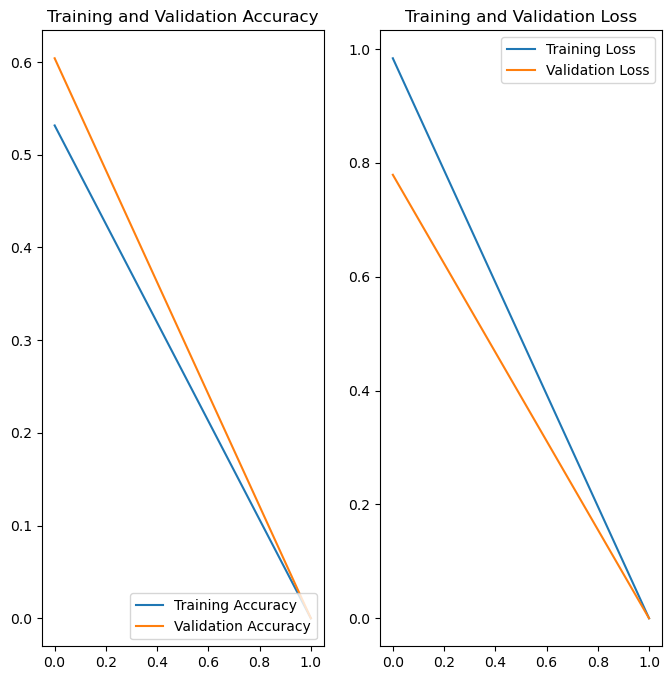

Training Accuracy:
0.0
Testing Accuracy:
0.0


In [28]:
train_test_animals()